In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
class RungeKutta():
    
    def __init__(self, x0, xn, y0, h = 0.1):
        # переменные, не меняющие значение
        self.XN = float(xn)
        self.H = float(h)
        self.X0 = float(x0)
        self.Y0 = float(y0)
        # переменные, меняющие значение
        self.x = float(x0)
        self.y = float(y0)
        # табулированная функция результата
        self.f2 = [self.y]
        self.f4 = [self.y]
        
    def function(self, x, y):
        return math.sin(x)*math.cos(x) - y*math.cos(x)
    
    def true_function(self, x):
        return math.sin(x) - 1 +2*math.e**(-math.sin(x))
    
    def true_tab_func(self):
        return [self.true_function(x) for x in np.arange(self.X0, self.XN, self.H)]
        
    
    def clear(self):
        self.x = self.X0
        self.y = self.Y0
        self.f2 = [self.y]
        self.f4 = [self.y]
    
    def rk2(self):
        self.clear()
        k1 = k2 = None
        while self.x <= (self.XN - self.H):
            k1 = self.function(self.x, self.y)
            k2 = self.function(self.x + self.H / 2, self.y + k1 * self.H / 2)
            self.y += k2 * self.H
            self.f2.append(self.y)
            self.x += self.H
        return self.f2
    
    def rk4(self):
        self.clear()
        k1 = k2 = k3 = k4 = None
        while self.x <= (self.XN - self.H):
            k1 = self.function(self.x, self.y)
            k2 = self.function(self.x + self.H/2, self.y + k1 * self.H/2)
            k3 = self.function(self.x + self.H/2, self.y + k2 * self.H/2)
            k4 = self.function(self.x + self.H, k3 * self.H)
            self.y += self.H/6*(k1 + 2*k2 + 2*k3 + k4)
            self.f4.append(self.y)
            self.x += self.H
        return self.f4        

In [3]:
def Runge_show(x, rk2, rk4, true_func):
    #plt.axhline(y=1.0, color="black", linestyle="--")
    #plt.axvline(color="grey")
    #plt.axline((0, 0.5), slope=0.25, color="black", linestyle=(0, (5, 5)))
    plt.figure(figsize = (8, 8))
    plt.plot(x, true_func, linewidth=2, label='First function', color='blue')
    plt.plot(x, rk2, linewidth=2, label='Runge-Kutta 2', color='yellow', linestyle="--")
    plt.plot(x, rk4, linewidth=2, label='Runge-Kutta 4', color='black', linestyle="--")
    #plt.xlim(-10, 10)
    #plt.xlabel("t")
    plt.legend(fontsize=14)
    plt.grid(color='black', linestyle=':', linewidth=1)
    plt.show()

In [4]:
RK = RungeKutta(0, 1, 1, 0.02)

In [5]:
rk2 = RK.rk2()

In [6]:
rk4 = RK.rk4()

In [7]:
true_func = RK.true_tab_func()

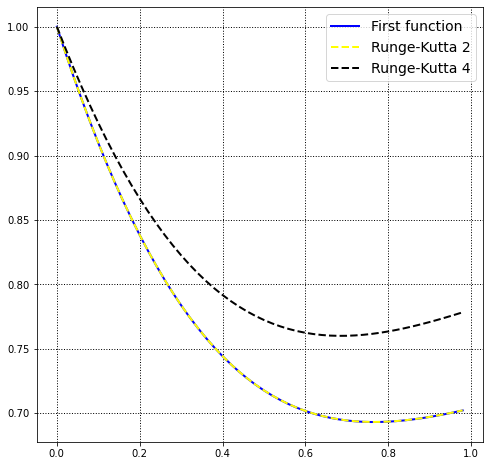

In [8]:
x = np.arange(RK.X0, RK.XN, RK.H)
Runge_show(x, rk2, rk4, true_func)